In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

%run ../load_magic/storage.py
s = Storage()
[f's.{fn}' for fn in dir(s) if not fn.startswith('_')]

['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']

In [5]:

import gensim

[f'gensim.models.{fn}' for fn in dir(gensim.models) if 'word2vec' in fn.lower()]

['gensim.models.Word2Vec', 'gensim.models.word2vec', 'gensim.models.word2vec_corpusfile', 'gensim.models.word2vec_inner']

In [150]:

%run ../py/html_analysis.py

In [ ]:

print([f'child_str_model.{fn}' for fn in dir(child_str_model) if not fn.startswith('_')])
print([f'child_str_model.wv.{fn}' for fn in dir(child_str_model.wv) if not fn.startswith('_')])

In [92]:

import warnings

warnings.filterwarnings('ignore')

In [91]:
# %load ../load_magic/get_dir_tree.txt

def get_dir_tree(module_name, max_levels=2, contains_str=None):
    if max_levels < 1:
        return None
    base_eval_str = f"['{module_name}.{{}}'.format(fn) for fn in dir({module_name}) if not fn.startswith('_')]"
    if contains_str is None:
        eval_str = base_eval_str
    else:
        eval_str = f"['{module_name}.{{}}'.format(fn) for fn in dir({module_name}) if '{contains_str.lower()}' in fn.lower()]"
    try:
        dir_list = eval(eval_str)
        if len(dir_list):
            print()
            print(module_name)
            print(dir_list)
    except Exception as e:
        print(f'The evaluated list {eval_str} gets this error: {str(e).strip()}')
    try:
        base_dir_list = eval(base_eval_str)
        if len(base_dir_list):
            for base_module_name in base_dir_list:
                get_dir_tree(base_module_name, max_levels=max_levels-1, contains_str=contains_str)
    except:
        return None

In [105]:

from inspect import signature

module_name = 'gensim.models'
base_eval_str = f"['{module_name}.{{}}'.format(fn) for fn in dir({module_name}) if not fn.startswith('_')]"
base_dir_list = eval(base_eval_str)
for model_name in base_dir_list:
    sig_eval_str = f'signature({model_name})'
    try:
        sig = eval(sig_eval_str)
        params = sig.parameters
        if(list(params.keys())[0].strip() == 'sentences'):
            print()
            print(model_name)
            print(params)
    except Exception as e:
        #print(f'The evaluated list {sig_eval_str} gets this error: {str(e).strip()}')
        pass


gensim.models.FastText
OrderedDict([('sentences', <Parameter "sentences=None">), ('corpus_file', <Parameter "corpus_file=None">), ('sg', <Parameter "sg=0">), ('hs', <Parameter "hs=0">), ('size', <Parameter "size=100">), ('alpha', <Parameter "alpha=0.025">), ('window', <Parameter "window=5">), ('min_count', <Parameter "min_count=5">), ('max_vocab_size', <Parameter "max_vocab_size=None">), ('word_ngrams', <Parameter "word_ngrams=1">), ('sample', <Parameter "sample=0.001">), ('seed', <Parameter "seed=1">), ('workers', <Parameter "workers=3">), ('min_alpha', <Parameter "min_alpha=0.0001">), ('negative', <Parameter "negative=5">), ('ns_exponent', <Parameter "ns_exponent=0.75">), ('cbow_mean', <Parameter "cbow_mean=1">), ('hashfxn', <Parameter "hashfxn=<built-in function hash>">), ('iter', <Parameter "iter=5">), ('null_word', <Parameter "null_word=0">), ('min_n', <Parameter "min_n=3">), ('max_n', <Parameter "max_n=6">), ('sorted_vocab', <Parameter "sorted_vocab=1">), ('bucket', <Parameter "

In [162]:

BASIC_TAGS_DICT = s.load_object('BASIC_TAGS_DICT')
print(len(BASIC_TAGS_DICT.keys()))
rows_list = [{'navigable_parent': navigable_parent, 'is_header': is_header} for navigable_parent, is_header in BASIC_TAGS_DICT.items()]
child_str_df = pd.DataFrame(rows_list)
tokenized_sents_list = [regex_tokenizer(sent_str) for sent_str in child_str_df.navigable_parent.tolist()]
child_str_model = gensim.models.FastText(tokenized_sents_list)

182


In [107]:

get_dir_tree('child_str_model', max_levels=3, contains_str='save')


child_str_model
['child_str_model._save_specials', 'child_str_model._smart_save', 'child_str_model.save']
The evaluated list ['child_str_model.syn1.{}'.format(fn) for fn in dir(child_str_model.syn1) if 'save' in fn.lower()] gets this error: 'FastTextTrainables' object has no attribute 'syn1'

child_str_model.trainables
['child_str_model.trainables._save_specials', 'child_str_model.trainables._smart_save', 'child_str_model.trainables.save']

child_str_model.vocabulary
['child_str_model.vocabulary._save_specials', 'child_str_model.vocabulary._smart_save', 'child_str_model.vocabulary.save']

child_str_model.wv
['child_str_model.wv._save_specials', 'child_str_model.wv._smart_save', 'child_str_model.wv.save', 'child_str_model.wv.save_word2vec_format']

child_str_model.wv.wv
['child_str_model.wv.wv._save_specials', 'child_str_model.wv.wv._smart_save', 'child_str_model.wv.wv.save', 'child_str_model.wv.wv.save_word2vec_format']


In [152]:

model_folder = os.path.join(s.data_folder, 'bin')
os.makedirs(name=model_folder, exist_ok=True)
file_path = os.path.join(model_folder, 'child_str_model.bin')
child_str_model.save(file_path)

In [ ]:

get_dir_tree('gensim', max_levels=3, contains_str='load')

In [153]:

file_path = os.path.join(model_folder, 'child_str_model.bin')
try:
    model = gensim.models.FastText.load(file_path)
except Exception as e:
    print(str(e).strip())

In [154]:

words = list(model.wv.vocab)
print(words)

['<div', 'you', 'by', 'data', 'Yelp', 'of', 'and', 'business', 'all', 'are', '.', 'is', 'work', 'to', 's', 'through', 'research', 'analysis', 'the', 'ideas', 'or', 'predictive', 'models', 'in', 'including', 'pricing', 'learning', '</div', 'our', ':', 'we', 're', 'a', 'team', 'that', 'solutions', 'problems', 'We', 'their', 'your', 'will', 'with', 'as', 'environment', '<b', 'You', '</b', '<li', '</li', 'development', 'product', 'other', 'technical', 'non', 'on', 'Python', 'Experience', 'etc', 'modeling', 'machine', 'A', 'for', 'be', 'an', 'experience', 'The', 'knowledge', '<i', '</i', 'at', '<p', 'one', 'time', '</p', 'techniques', '10', 'years', 'insurance', 'Preferred', 'Work', 'identify', 'complex', 'Liberty', 'Mutual', 'help', 'well', 'have', 'science', 'products']


In [155]:

print(model['</b'])

[ 2.7203190e-03 -5.3446786e-04  2.7605859e-03  2.5393346e-03
 -2.7105988e-03  1.3577512e-03  2.2339833e-03  3.5515247e-04
 -1.4417348e-03 -3.9453055e-03 -1.4255015e-03  2.8319384e-03
  2.2162274e-03 -1.6421817e-04 -3.8439913e-03 -5.0404854e-03
 -4.4764923e-03  2.8845857e-04 -1.3423584e-04  2.2251159e-03
  8.6789578e-04 -1.7044983e-03 -1.3835243e-03 -9.4268828e-05
  2.6131603e-03 -1.8224508e-03  1.8014602e-03  1.9377664e-03
  2.2692992e-03  2.4037019e-03  2.2157296e-03 -4.8914959e-04
  2.1294956e-05  1.9669104e-03 -4.6339579e-04  8.7252544e-04
  7.9120445e-04 -3.2163996e-03  1.8571998e-03  2.9487435e-05
 -4.3141309e-04 -3.3927166e-03  3.8673135e-03 -4.9727090e-04
 -1.0968887e-03 -3.8052357e-03 -8.3846692e-04 -3.0222847e-03
  1.6846148e-03  1.1859043e-03 -3.9928904e-04  1.0026739e-03
  3.0033384e-04 -4.5294194e-03 -7.8115362e-04  2.6250638e-03
  1.8748888e-05  8.2744705e-04  1.5854567e-03  9.9403656e-04
  1.4195583e-03  1.8555402e-03  4.0462073e-03  2.0374621e-03
  8.9561276e-04  6.21232

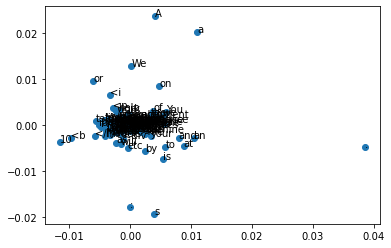

In [156]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
PathCollection_obj = plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(model.wv.vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

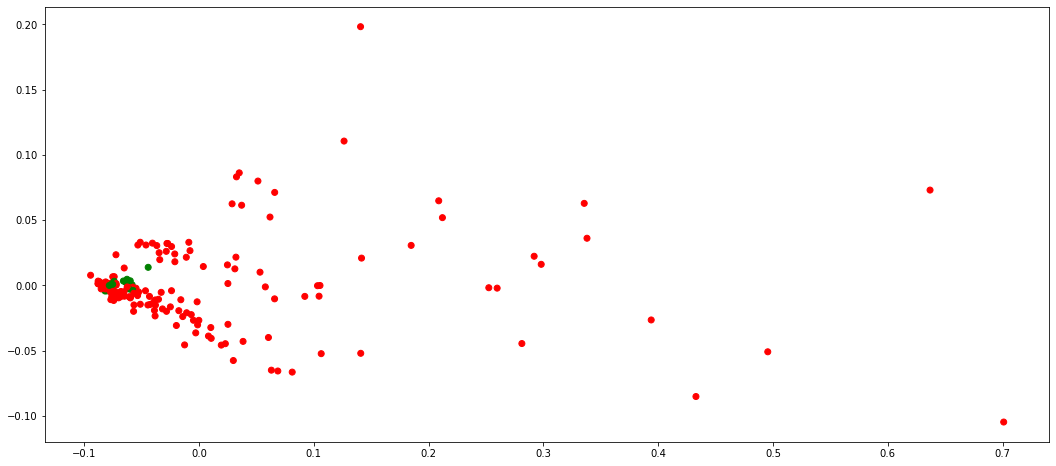

In [158]:

fig, ax = plt.subplots(figsize=(18, 8))
array_list = []
colors_list = ['g' if is_header else 'r' for is_header in child_str_df.is_header]
for i, words_list in enumerate(sents_list):
    vector_str = "'] + model['".join(words_list)
    command_str = f"model['{vector_str}']"
    array_list.append(eval(command_str))
X = np.stack(array_list)
result = pca.fit_transform(X)
PathCollection_obj = plt.scatter(result[:, 0], result[:, 1], c=colors_list)
for i, words_list in enumerate(sents_list):
    if(colors_list[i] == 'g'):
        sent = ' '.join([word for word in words_list[:3]])
        plt.annotate(sent, xy=(result[i, 0], result[i, 1]))

In [159]:

model['<b'] + model['</b']

array([ 4.9722139e-03, -2.5563492e-03,  3.2361266e-03,  1.0087268e-02,
        3.7467445e-03,  1.2003600e-03, -3.9688637e-03, -7.6739345e-04,
       -6.1949538e-03, -5.7836585e-03, -1.9951670e-03,  3.1307545e-03,
       -3.2120459e-03, -2.4996663e-03, -2.7586478e-03, -4.3330081e-03,
       -2.7348953e-03,  1.1146199e-03,  2.8327154e-04,  5.5341627e-03,
        7.9473376e-04, -1.3953743e-03, -2.4549142e-03,  1.2831402e-04,
        1.3039189e-03, -7.7126818e-03,  2.6818840e-03,  3.8772300e-03,
        1.3428319e-03,  4.0687290e-03,  3.5975797e-03, -3.8653477e-03,
        2.4297121e-03, -2.9469738e-03, -1.3864629e-03,  3.0372145e-03,
        5.0609484e-03, -2.2168485e-03,  6.5672444e-03,  5.5237691e-04,
        1.8459028e-03,  1.6958581e-03,  8.4716016e-03, -1.2514277e-04,
       -4.3546082e-05,  1.6238240e-03, -2.0329885e-03, -2.0718505e-04,
        2.1554597e-03, -1.1351004e-03, -1.0548622e-04,  5.5204285e-04,
       -8.8604470e-04, -2.7435534e-03, -8.4373320e-04,  4.9042241e-03,
      


----

In [165]:

from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
headers_dictionary = Dictionary(tokenized_sents_list)
headers_corpus = [headers_dictionary.doc2bow(tag_str) for tag_str in tokenized_sents_list]

In [166]:

# Train the model on the corpus
lda = gensim.models.ldamodel.LdaModel(corpus=headers_corpus, num_topics=2)

In [168]:

# Save model to disk
model_folder = os.path.join(s.data_folder, 'lda')
os.makedirs(name=model_folder, exist_ok=True)
file_path = os.path.join(model_folder, 'child_str_model.lda')
lda.save(file_path)

In [169]:

# Load a potentially pretrained model from disk
lda = gensim.models.ldamodel.LdaModel.load(file_path)

In [171]:

regex_tokenizer('<b>Required Qualifications:</b>')

['<b', 'Required', 'Qualifications', ':', '</b']


----

In [194]:

%run .../py/html_analysis.py

In [196]:

# Create a new corpus, made of previously unseen documents
other_texts = [
    ['<li', 'MS', 'or', 'PhD', 'in', 'Applied', 'Mathematics', 'Physics', 'Computer', 'Science', 'Statistics', 'or', 'related',
     'technical', 'field', '.', '</li'],
    ['<b', 'Required', 'Qualifications', ':', '</b']
]
other_corpus = [headers_dictionary.doc2bow(text) for text in other_texts]
TransformedCorpus_obj = lda[other_corpus]
[f'TransformedCorpus_obj.{fn}' for fn in dir(TransformedCorpus_obj) if not fn.startswith('_')]

['TransformedCorpus_obj.chunksize', 'TransformedCorpus_obj.corpus', 'TransformedCorpus_obj.load', 'TransformedCorpus_obj.metadata', 'TransformedCorpus_obj.obj', 'TransformedCorpus_obj.save', 'TransformedCorpus_obj.save_corpus']

In [224]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer

# Re-transform the bag-of-words and tf-idf from the new manual scores
BASIC_TAGS_DICT = s.load_object('BASIC_TAGS_DICT')
rows_list = [{'navigable_parent': navigable_parent,
              'is_header': is_header} for navigable_parent, is_header in BASIC_TAGS_DICT.items()]
child_str_df = pd.DataFrame(rows_list)
sents_list = child_str_df.navigable_parent.tolist()

# Re-calibrate the inference engine
tt = TfidfTransformer(**{'norm': 'l1', 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': True})
cv = CountVectorizer(**{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'lowercase': False, 'max_df': 1.0,
                        'max_features': None, 'min_df': 0.0, 'ngram_range': (1, 5), 'stop_words': None, 'strip_accents': 'ascii',
                        'tokenizer': regex_tokenizer})
bow_matrix = cv.fit_transform(sents_list)
tfidf_matrix = tt.fit_transform(bow_matrix)
X = tfidf_matrix.toarray()
y = child_str_df.is_header.to_numpy()
child_str_clf = LogisticRegression(**{'C': 375.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'max_iter': 4,
                                      'penalty': 'l1', 'solver': 'liblinear', 'tol': 7e-07})
child_str_clf.fit(X, y)
CS_TT = s.load_object('CS_TT')
cs_cv_vocab = s.load_object('cs_cv_vocab')
CS_CV = CountVectorizer(vocabulary=cs_cv_vocab)
CS_CV._validate_vocabulary()
CLF_NAME = 'LogisticRegression'

In [227]:

import random
from bs4 import BeautifulSoup
from bs4.element import NavigableString
from IPython.display import HTML

SAVES_HTML_FOLDER = os.path.join(s.saves_folder, 'html')
files_list = os.listdir(SAVES_HTML_FOLDER)
file_name = random.choice(files_list)
file_path = os.path.join(SAVES_HTML_FOLDER, file_name)
with open(file_path, 'r', encoding='utf-8') as f:
    html_str = f.read()
job_soup = BeautifulSoup(html_str, 'lxml')
body_soup = job_soup.find_all(name='body')[0]

# Get a list of strings beginning and ending with an html tag
child_strs_list = get_navigable_children(body_soup, [])
sents_list = [regex_tokenizer(sent_str) for sent_str in child_strs_list]
offering_corpus = [headers_dictionary.doc2bow(text) for text in sents_list]
for y_predict_proba, child_str, corpus_str in zip(predict_percent_fit(child_strs_list), child_strs_list, offering_corpus):
    print()
    results_list = lda[corpus_str]
    lda_probability = results_list[0][1]
    lr_probability = y_predict_proba[1]
    lda_str = str(round(lda_probability, 2))
    lr_str = str(round(lr_probability, 2))
    print(f'LDA: {lda_str}, LR: {lr_str}, Text: {child_str[:50]}...')
    if (lda_probability > 0.5) or (y_predict_proba[1] > 0.05):
        display(HTML(child_str))


LDA: 0.65, LR: 0.13, Text: <p>Job Requirements:</p>...



LDA: 0.64, LR: 0.0, Text: <li>Conduct work in accordance with company standa...



LDA: 0.79, LR: 0.0, Text: <li>Assist clients by providing analytical strateg...



LDA: 0.93, LR: 0.0, Text: <li>Independent project development, including but...



LDA: 0.62, LR: 0.0, Text: <li>Evaluate and incorporate latest analytical app...



LDA: 0.03, LR: 0.0, Text: <li>Provide quality control and analysis of a wide...

LDA: 0.08, LR: 0.0, Text: <li>Perform statistical programming in R, SAS, and...

LDA: 0.33, LR: 0.0, Text: <li>Interpret findings with scientific and busines...

LDA: 0.86, LR: 0.0, Text: <li>Attend on site client visits and present findi...



LDA: 0.37, LR: 0.0, Text: <li>Provide guidance to internal team members on s...

LDA: 0.18, LR: 0.13, Text: <b>Qualifications:</b>...



LDA: 0.94, LR: 0.0, Text: <li>Ph.D. REQUIRED. Preferred Degree in: Statistic...



LDA: 0.84, LR: 0.0, Text: <li>At least 3 years of experience in applied proj...



LDA: 0.6, LR: 0.0, Text: <li>Demonstrated expertise in the theory and appli...



LDA: 0.89, LR: 0.0, Text: <li>Knowledge of statistical methodologies and app...



LDA: 0.65, LR: 0.0, Text: <li>Excellent analytical and problem-solving skill...



LDA: 0.65, LR: 0.0, Text: <li>Excellent written and verbal communication ski...



LDA: 0.81, LR: 0.0, Text: <li>Proven ability to work independently and in a ...



LDA: 0.66, LR: 0.0, Text: <li>Experience with omic data is required; experie...



LDA: 0.4, LR: 0.0, Text: <li>Experience with public databases (e.g. TCGA, U...

LDA: 0.05, LR: 0.0, Text: <li>Proficiency in R programming is required; prof...

LDA: 0.32, LR: 0.0, Text: <li>Experience with machine learning tools and pac...

LDA: 0.8, LR: 0.0, Text: <li>Experience with statistical and bioinformatics...



LDA: 0.62, LR: 0.0, Text: <li>Experience with linear/nonlinear mixed model t...



LDA: 0.4, LR: 0.0, Text: <li>Experience with relational databases (e.g. MyS...

LDA: 0.22, LR: 0.0, Text: <li>Qualified candidates must be legally authorize...

LDA: 0.09, LR: 0.0, Text: <b>BioStat Solutions, LLC is a voluntary equal opp...

LDA: 0.88, LR: 0.13, Text: <p>HR-OP-GDS-004 10/05/2020</p>...



LDA: 0.18, LR: 0.0, Text: <p>Job Type: Full-time</p>...

LDA: 0.93, LR: 0.13, Text: <p>Pay: $0.00 per hour</p>...



LDA: 0.88, LR: 0.13, Text: <p>Benefits:</p>...



LDA: 0.88, LR: 0.13, Text: <li>401(k)</li>...



LDA: 0.87, LR: 0.01, Text: <li>Dental insurance</li>...



LDA: 0.88, LR: 0.04, Text: <li>Disability insurance</li>...



LDA: 0.85, LR: 0.13, Text: <li>Employee assistance program</li>...



LDA: 0.88, LR: 0.13, Text: <li>Flexible schedule</li>...



LDA: 0.88, LR: 0.05, Text: <li>Health insurance</li>...



LDA: 0.84, LR: 0.05, Text: <li>Life insurance</li>...



LDA: 0.9, LR: 0.0, Text: <li>Paid time off</li>...



LDA: 0.8, LR: 0.13, Text: <li>Referral program</li>...



LDA: 0.88, LR: 0.13, Text: <li>Relocation assistance</li>...



LDA: 0.86, LR: 0.13, Text: <li>Tuition reimbursement</li>...



LDA: 0.84, LR: 0.05, Text: <li>Vision insurance</li>...



LDA: 0.88, LR: 0.13, Text: <p>Schedule:</p>...



LDA: 0.9, LR: 0.0, Text: <li>Monday to Friday</li>...



LDA: 0.87, LR: 0.0, Text: <p>Experience:</p>...



LDA: 0.9, LR: 0.13, Text: <li>Linux/UNIX: 1 year (Required)</li>...



LDA: 0.89, LR: 0.0, Text: <li>omic data: 1 year (Required)</li>...



LDA: 0.9, LR: 0.0, Text: <li>sequencing data: 1 year (Preferred)</li>...



LDA: 0.93, LR: 0.0, Text: <li>machine learning tools and packages: 1 year (P...



LDA: 0.73, LR: 0.13, Text: <li>R programming: 1 year (Required)</li>...



LDA: 0.88, LR: 0.13, Text: <p>Education:</p>...



LDA: 0.88, LR: 0.13, Text: <li>Doctorate (Required)</li>...



LDA: 0.87, LR: 0.0, Text: <p>Work authorization:</p>...



LDA: 0.84, LR: 0.13, Text: <li>United States (Required)</li>...



LDA: 0.9, LR: 0.13, Text: <p>Company's website:</p>...



LDA: 0.92, LR: 0.13, Text: <li>https://www.biostatsolutions.com/</li>...



LDA: 0.84, LR: 0.13, Text: <p>Benefit Conditions:</p>...



LDA: 0.69, LR: 0.0, Text: <li>Only full-time employees eligible</li>...



LDA: 0.89, LR: 0.0, Text: <p>Work Remotely:</p>...



LDA: 0.94, LR: 0.0, Text: <li>Yes, temporarily due to COVID-19</li>...


[(0, 0.40086234), (1, 0.5991377)]

In [180]:

[f'gensim.interfaces.TransformedCorpus.{fn}' for fn in dir(gensim.interfaces.TransformedCorpus) if not fn.startswith('_')]

['gensim.interfaces.TransformedCorpus.load', 'gensim.interfaces.TransformedCorpus.save', 'gensim.interfaces.TransformedCorpus.save_corpus']

In [179]:

TransformedCorpus_obj?

Type:           TransformedCorpus
String form:    <gensim.interfaces.TransformedCorpus object at 0x0000017437AE91C0>
Length:         2
File:           c:\users\dev\anaconda3\envs\jh\lib\site-packages\gensim\interfaces.py
Docstring:      Interface for corpora that are the result of an online (streamed) transformation.
Init docstring:
Parameters
----------
obj : object
    A transformation :class:`~gensim.interfaces.TransformationABC` object that will be applied
    to each document from `corpus` during iteration.
corpus : iterable of list of (int, number)
    Corpus in bag-of-words format.
chunksize : int, optional
    If provided, a slightly more effective processing will be performed by grouping documents from `corpus`.


In [178]:

[f'gensim.models.ldamodel.LdaModel.{fn}' for fn in dir(gensim.models.ldamodel.LdaModel) if not fn.startswith('_')]

['gensim.models.ldamodel.LdaModel.bound', 'gensim.models.ldamodel.LdaModel.clear', 'gensim.models.ldamodel.LdaModel.diff', 'gensim.models.ldamodel.LdaModel.do_estep', 'gensim.models.ldamodel.LdaModel.do_mstep', 'gensim.models.ldamodel.LdaModel.get_document_topics', 'gensim.models.ldamodel.LdaModel.get_term_topics', 'gensim.models.ldamodel.LdaModel.get_topic_terms', 'gensim.models.ldamodel.LdaModel.get_topics', 'gensim.models.ldamodel.LdaModel.inference', 'gensim.models.ldamodel.LdaModel.init_dir_prior', 'gensim.models.ldamodel.LdaModel.load', 'gensim.models.ldamodel.LdaModel.log_perplexity', 'gensim.models.ldamodel.LdaModel.print_topic', 'gensim.models.ldamodel.LdaModel.print_topics', 'gensim.models.ldamodel.LdaModel.save', 'gensim.models.ldamodel.LdaModel.show_topic', 'gensim.models.ldamodel.LdaModel.show_topics', 'gensim.models.ldamodel.LdaModel.sync_state', 'gensim.models.ldamodel.LdaModel.top_topics', 'gensim.models.ldamodel.LdaModel.update', 'gensim.models.ldamodel.LdaModel.update

In [177]:

lda?

Type:           LdaModel
String form:    LdaModel(num_terms=972, num_topics=2, decay=0.5, chunksize=2000)
File:           c:\users\dev\anaconda3\envs\jh\lib\site-packages\gensim\models\ldamodel.py
Docstring:     
Train and use Online Latent Dirichlet Allocation (OLDA) models as presented in
`Hoffman et al. :"Online Learning for Latent Dirichlet Allocation" <https://www.di.ens.fr/~fbach/mdhnips2010.pdf>`_.

Examples
-------
Initialize a model using a Gensim corpus

.. sourcecode:: pycon

    >>> from gensim.test.utils import common_corpus
    >>>
    >>> lda = LdaModel(common_corpus, num_topics=10)

You can then infer topic distributions on new, unseen documents.

.. sourcecode:: pycon

    >>> doc_bow = [(1, 0.3), (2, 0.1), (0, 0.09)]
    >>> doc_lda = lda[doc_bow]

The model can be updated (trained) with new documents.

.. sourcecode:: pycon

    >>> # In practice (corpus =/= initial training corpus), but we use the same here for simplicity.
    >>> other_corpus = common_corpus
    >>

In [28]:

review_folder = os.path.join(s.saves_folder, 'txt')
os.makedirs(name=review_folder, exist_ok=True)
file_path = os.path.join(review_folder, 'child_str_model.txt')
child_str_model.wv.save_word2vec_format(file_path, binary=False)

In [43]:

import pickle

[f'pickle.{fn}' for fn in dir(pickle) if 'err' in fn.lower()]

['pickle.PickleError', 'pickle.PicklingError', 'pickle.UnpicklingError']

In [38]:

[f'gensim.utils.{fn}' for fn in dir(gensim.utils) if not fn.startswith('_')]

['gensim.utils.ClippedCorpus', 'gensim.utils.FakeDict', 'gensim.utils.InputQueue', 'gensim.utils.NO_CYTHON', 'gensim.utils.PAT_ALPHABETIC', 'gensim.utils.RE_HTML_ENTITY', 'gensim.utils.RULE_DEFAULT', 'gensim.utils.RULE_DISCARD', 'gensim.utils.RULE_KEEP', 'gensim.utils.RepeatCorpus', 'gensim.utils.RepeatCorpusNTimes', 'gensim.utils.SaveLoad', 'gensim.utils.SlicedCorpus', 'gensim.utils.any2unicode', 'gensim.utils.any2utf8', 'gensim.utils.call_on_class_only', 'gensim.utils.check_output', 'gensim.utils.chunkize', 'gensim.utils.chunkize_serial', 'gensim.utils.collections', 'gensim.utils.contextmanager', 'gensim.utils.copytree_hardlink', 'gensim.utils.cpu_count', 'gensim.utils.deaccent', 'gensim.utils.decode_htmlentities', 'gensim.utils.deprecated', 'gensim.utils.dict_from_corpus', 'gensim.utils.effective_n_jobs', 'gensim.utils.file_or_filename', 'gensim.utils.flatten', 'gensim.utils.getNS', 'gensim.utils.get_max_id', 'gensim.utils.get_my_ip', 'gensim.utils.get_random_state', 'gensim.utils.g

In [41]:
# %load ../load_magic/pip_install.txt

import sys

# After this has completed, run these commands in a PowerShell window:
# cd $Env:UserProfile\Documents\Repositories\job-hunting\ps1
# clear
# .\create_job_hunting_temp_environment_yml_file.ps1
command_str = f'{sys.executable} -m pip install --upgrade xxxxxxx'
print(command_str)
!{command_str}

C:\Users\dev\Anaconda3\envs\jh\python.exe -m pip install --upgrade cPickle


ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle
